In [1]:
# Classification 
#-> Logistic regression -> gives categorical output
# Can be used to find the probablity of the error ( Type -1 and Type -2 ) through confusion matrix

In [62]:
import pandas as pd # find which customer is leaving -> Binary Class problem (0 or 1)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
churn_df = pd.read_csv("C:\\Users\\sameer\\Desktop\\ChurnData.csv",delimiter = ',',encoding = 'ISO-8859-1')
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
tenure      200 non-null float64
age         200 non-null float64
address     200 non-null float64
income      200 non-null float64
ed          200 non-null float64
employ      200 non-null float64
equip       200 non-null float64
callcard    200 non-null float64
wireless    200 non-null float64
longmon     200 non-null float64
tollmon     200 non-null float64
equipmon    200 non-null float64
cardmon     200 non-null float64
wiremon     200 non-null float64
longten     200 non-null float64
tollten     200 non-null float64
cardten     200 non-null float64
voice       200 non-null float64
pager       200 non-null float64
internet    200 non-null float64
callwait    200 non-null float64
confer      200 non-null float64
ebill       200 non-null float64
loglong     200 non-null float64
logtoll     200 non-null float64
lninc       200 non-null float64
custcat     200 non-null float64
chur

In [64]:
churn_df.shape

(200, 28)

In [65]:
churn_df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [66]:
churn_df = churn_df[['tenure','age','address','income','ed','employ','equip','callcard','wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [67]:
churn_df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'churn'],
      dtype='object')

In [68]:
# defining x and y
X = np.asanyarray(churn_df[['tenure','age','address','income','ed','employ','equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [69]:
churn_df.describe()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000,1.000000


In [71]:
y = np.asanyarray(churn_df['churn'])
y[0:5]

array([1, 1, 0, 0, 0])

In [72]:
from sklearn.preprocessing import MinMaxScaler # scaling the data
x = MinMaxScaler().fit_transform(X)
x

array([[0.14084507, 0.24561404, 0.14583333, ..., 1.        , 0.11363636,
        0.        ],
       [0.45070423, 0.24561404, 0.25      , ..., 0.25      , 0.        ,
        0.        ],
       [0.30985915, 0.19298246, 0.1875    , ..., 0.        , 0.04545455,
        0.        ],
       ...,
       [0.07042254, 0.22807018, 0.20833333, ..., 0.        , 0.22727273,
        0.        ],
       [0.32394366, 0.19298246, 0.        , ..., 0.75      , 0.11363636,
        0.        ],
       [0.84507042, 0.54385965, 0.33333333, ..., 0.25      , 0.5       ,
        1.        ]])

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)
print('Train set: ',X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (160, 7) (160,)
Test set:  (40, 7) (40,)


In [74]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C = 0.8, solver = 'liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.8, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [97]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [98]:
yhat_prob = LR.predict_proba(X_test) # proba finds the probablity of '0' and '1'
yhat_prob

array([[0.69880777, 0.30119223],
       [0.87916684, 0.12083316],
       [0.79814196, 0.20185804],
       [0.90156292, 0.09843708],
       [0.81408382, 0.18591618],
       [0.7333875 , 0.2666125 ],
       [0.75902961, 0.24097039],
       [0.86128762, 0.13871238],
       [0.36168062, 0.63831938],
       [0.90709098, 0.09290902],
       [0.78428863, 0.21571137],
       [0.82305258, 0.17694742],
       [0.62399629, 0.37600371],
       [0.40929666, 0.59070334],
       [0.88257527, 0.11742473],
       [0.62195432, 0.37804568],
       [0.63471947, 0.36528053],
       [0.65793292, 0.34206708],
       [0.62364964, 0.37635036],
       [0.76547244, 0.23452756],
       [0.87371436, 0.12628564],
       [0.64489832, 0.35510168],
       [0.9230604 , 0.0769396 ],
       [0.59214805, 0.40785195],
       [0.59886831, 0.40113169],
       [0.94699842, 0.05300158],
       [0.5975927 , 0.4024073 ],
       [0.64846322, 0.35153678],
       [0.72021599, 0.27978401],
       [0.95417345, 0.04582655],
       [0.

In [99]:
# Evaluation-> Performance of model is checked
yhat_prob

array([[0.69880777, 0.30119223],
       [0.87916684, 0.12083316],
       [0.79814196, 0.20185804],
       [0.90156292, 0.09843708],
       [0.81408382, 0.18591618],
       [0.7333875 , 0.2666125 ],
       [0.75902961, 0.24097039],
       [0.86128762, 0.13871238],
       [0.36168062, 0.63831938],
       [0.90709098, 0.09290902],
       [0.78428863, 0.21571137],
       [0.82305258, 0.17694742],
       [0.62399629, 0.37600371],
       [0.40929666, 0.59070334],
       [0.88257527, 0.11742473],
       [0.62195432, 0.37804568],
       [0.63471947, 0.36528053],
       [0.65793292, 0.34206708],
       [0.62364964, 0.37635036],
       [0.76547244, 0.23452756],
       [0.87371436, 0.12628564],
       [0.64489832, 0.35510168],
       [0.9230604 , 0.0769396 ],
       [0.59214805, 0.40785195],
       [0.59886831, 0.40113169],
       [0.94699842, 0.05300158],
       [0.5975927 , 0.4024073 ],
       [0.64846322, 0.35153678],
       [0.72021599, 0.27978401],
       [0.95417345, 0.04582655],
       [0.

In [100]:
yhat_prob[:,0]

array([0.69880777, 0.87916684, 0.79814196, 0.90156292, 0.81408382,
       0.7333875 , 0.75902961, 0.86128762, 0.36168062, 0.90709098,
       0.78428863, 0.82305258, 0.62399629, 0.40929666, 0.88257527,
       0.62195432, 0.63471947, 0.65793292, 0.62364964, 0.76547244,
       0.87371436, 0.64489832, 0.9230604 , 0.59214805, 0.59886831,
       0.94699842, 0.5975927 , 0.64846322, 0.72021599, 0.95417345,
       0.93280129, 0.69586913, 0.38934946, 0.9387867 , 0.89115843,
       0.86549028, 0.32705834, 0.71047133, 0.8780009 , 0.66394932])

In [101]:
# Method to check the performance of a classifier (eg- logistic regression)
# 1. Confusion matrix -> Check for True-Positive, True-Negative, False-Positve, False-Negative
# 2. ROC (Receiver operating charaterstic) / AUC (Area under curve)

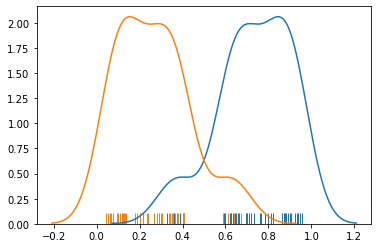

In [102]:
import seaborn as sns
sns.distplot(yhat_prob[:,0], hist = False, rug = True)
sns.distplot(yhat_prob[:,1], hist = False, rug = True)

In [103]:
# performance matrix
# checking the efficiency of model through 'Jaccard index', 'Log loss' and 'F1 score'
#  Jaccard index-> works on (intersection of actual 'y' and predicted 'y'/union of actual 'y' and predicted 'y')
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test,yhat)

C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.725

In [104]:
# Log loss
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob) # work on testing value of 'y' and probablity of predicted 'y'

0.6182452187171121

In [105]:
# F1 score
from sklearn.metrics import f1_score
f1_score(y_test, yhat)

0.4210526315789474

In [107]:
# confusion matrix tells when classifier got confused
# False - Positive is a 'Type 1 Error'
# False - Negative is a 'Type 2 Error'
from sklearn.metrics import classification_report, confusion_matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels = [1,0])
cnf_matrix # [[ True-Positive(was leaving and truely left)           False-Negative (left but we thought not gonna leave)]
           # [ False- Positive(we thought gonna leave but not left)  True-negative(not leaving and truely not left)]]

array([[ 4, 11],
       [ 0, 25]], dtype=int64)